In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


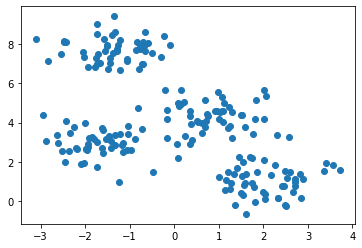

In [3]:
plt.scatter(X[:,0],X[:,1]);


In [4]:
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[ 0.86008475  4.31501411]
 [-1.36512238  7.70188306]
 [-1.70639178  2.9104771 ]
 [ 2.07464749  0.9869902 ]]


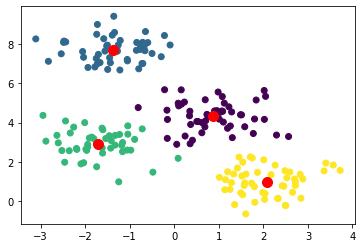

In [5]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres


In [6]:

from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.49


Even though the clusters could match almost perfectly to the original, their labels might be permuted. Let’s select randomly one point from each cluster and check their labels from the original data labels. Then we use this label for the whole cluster. In essence, we are renaming the clusters, not re-clustering the data.

In [0]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [8]:
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[0, 3, 2, 1]


In [9]:

new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.99


So, the k-means algorithm seems to work well in this case, but there can be several problems. Firstly, even though an EM algorithm always converges, it might converge to a local maximum. To avoid this, EM type algorithms are usually run several times, each time starting from different random initial values. For instance, in the scikit-learn implementation, the algorithms is restarted by default 10 times.

**More complicated example**

In [0]:

from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

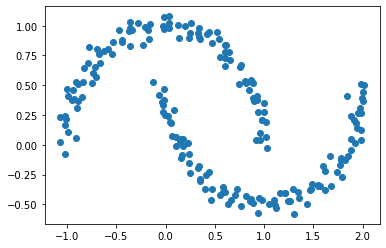

In [11]:
plt.scatter(X[:,0], X[:,1]);


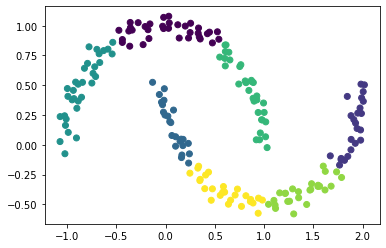

In [46]:
model=KMeans(7)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

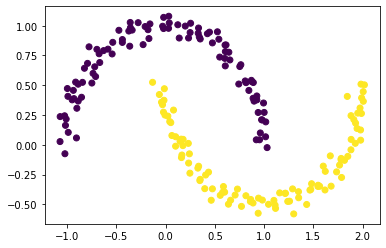

In [49]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

In [50]:
model.labels_.max()

1

In [51]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.5


**Clustering digits**

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

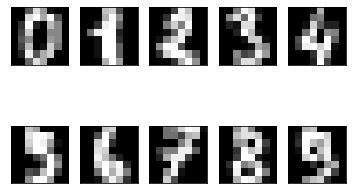

In [53]:

fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, digits.data[:10]):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [54]:
model=KMeans(n_clusters = 10, random_state=0)
model.fit(digits.data)
model.cluster_centers_.shape

(10, 64)

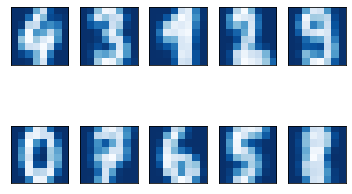

In [57]:

fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, model.cluster_centers_):
    ax.imshow(digit.reshape(8,8), cmap="Blues_r")

In [58]:
permutation3 = find_permutation(10, digits.target, model.labels_)
print(permutation3)
acc = accuracy_score(digits.target, [ permutation3[label] for label in model.labels_])
print("Accuracy score is", acc)

[4, 3, 1, 2, 9, 0, 7, 6, 5, 8]
Accuracy score is 0.7952142459654981


This is quite a good result for such a simple algorithm!